In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
d = 32
k = 7
n = 1100

In [3]:
A = np.zeros((k, n, d))

In [4]:
C = np.random.rand(k,d)

In [5]:
for _k in range(k):
    A[_k,:,:] = C[_k] - 0.2 * np.random.randn(n,d)

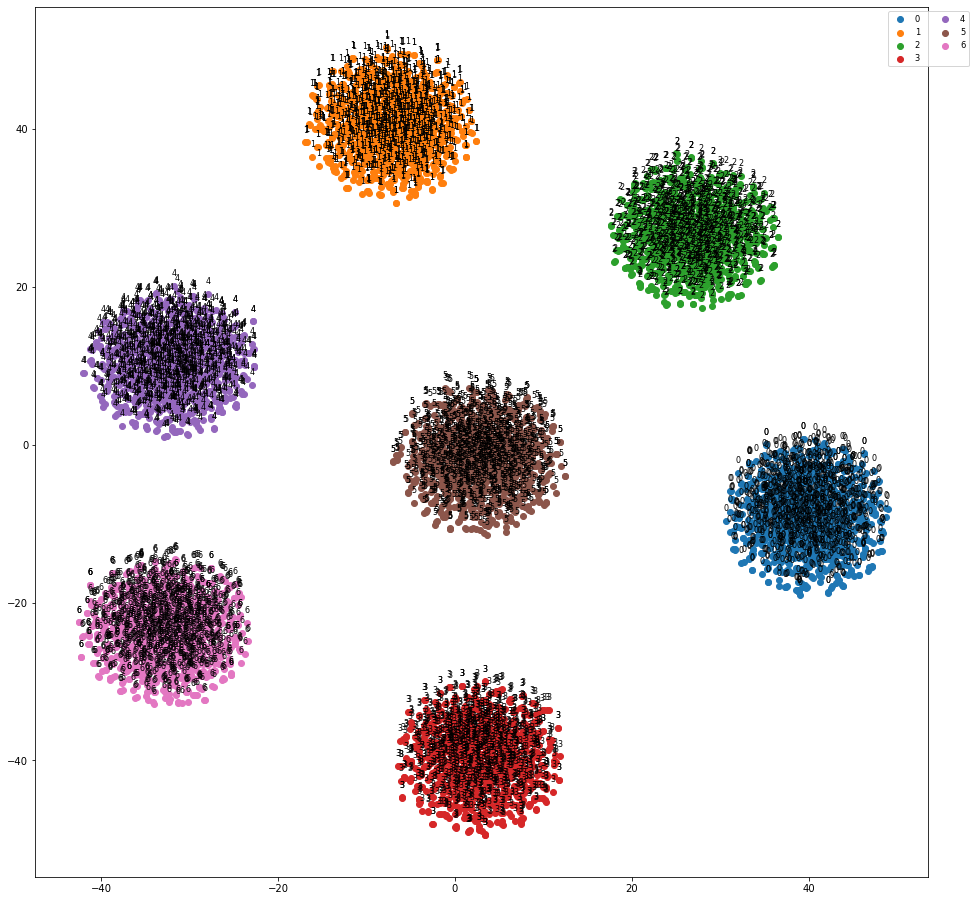

In [6]:
from sklearn.manifold import TSNE
encodings = {"encodings": np.reshape(A, (k * n, d)),
             "labels": np.repeat(np.arange(k), n)}
labels = np.arange(k)
tsne = TSNE()
tsne_train = tsne.fit_transform(encodings['encodings'])
fig, ax = plt.subplots(figsize=(16, 16))
for i, l in enumerate(labels):
    xs = tsne_train[np.array(encodings['labels']) == l, 0]
    ys = tsne_train[np.array(encodings['labels']) == l, 1]
    ax.scatter(xs, ys, label=l)
    #ax.scatter(xs, ys)
    for x, y in zip(xs, ys):
        plt.annotate(l,
                     (x, y),
                     size=8,
                     textcoords="offset points",
                     xytext=(0, 10),
                     ha='center')

ax.legend(bbox_to_anchor=(1.05, 1), fontsize='small', ncol=2)

In [7]:
def reorganize(A):
    labels = np.repeat(np.arange(A.shape[0]), A.shape[1])
    data = np.reshape(A, (A.shape[0] * A.shape[1], A.shape[2]))
    return {'data': data, 'labels': labels}

In [8]:
A_train, A_val, A_test = A[:5, :1000, :], A[:5, 1000:, :], A[5:, :, :]
A_train = reorganize(A_train)
A_val = reorganize(A_val)
A_test = reorganize(A_test)

A_dict = {'train' : A_train, 'val' : A_val, 'test' : A_test}

In [9]:
import pickle
fn = '../Dataset/' + 'generated_{}D_{}classes.pkl'.format(d, k)
with open(fn, 'wb') as file_pi:
    pickle.dump(A_dict, file_pi)